Versione 4 - versione 1A con aggiunta metrica F1 score e addestramento per 10 epoche senza early stopping.

# LOAD THE DATA

Creo un DataFrame pandas dal dataset _UNSW-NB15_:

In [1]:
import pandas as pd

# Apro i file CSV e creo un DataFrame
file_1 = pd.read_csv('UNSW-NB15_1.csv', header=None, low_memory=False)      # non hanno l'intestazione
file_2 = pd.read_csv('UNSW-NB15_2.csv', header=None, low_memory=False)      
file_3 = pd.read_csv('UNSW-NB15_3.csv', header=None, low_memory=False)      
file_4 = pd.read_csv('UNSW-NB15_4.csv', header=None, low_memory=False)      

# Concateno i quattro file verticalmente
df = pd.concat([file_1, file_2, file_3, file_4], axis=0, ignore_index=True)

In [2]:
# Sbircio la struttura
df.info

<bound method DataFrame.info of                    0      1               2      3    4    5         6     7    
0          59.166.0.0   1390   149.171.126.6     53  udp  CON  0.001055   132  \
1          59.166.0.0  33661   149.171.126.9   1024  udp  CON  0.036133   528   
2          59.166.0.6   1464   149.171.126.7     53  udp  CON  0.001119   146   
3          59.166.0.5   3593   149.171.126.5     53  udp  CON  0.001209   132   
4          59.166.0.3  49664   149.171.126.0     53  udp  CON  0.001169   146   
...               ...    ...             ...    ...  ...  ...       ...   ...   
2540042    59.166.0.5  33094   149.171.126.7  43433  tcp  FIN  0.087306   320   
2540043    59.166.0.7  20848   149.171.126.4     21  tcp  CON  0.365058   456   
2540044    59.166.0.3  21511   149.171.126.9     21  tcp  CON  6.335154  1802   
2540045    59.166.0.9  35433   149.171.126.0     80  tcp  CON  2.200934  3498   
2540046  175.45.176.0  17293  149.171.126.17    110  tcp  CON  0.942984   574

Il dataset non ha l'intestazione, dunque la aggiungo manualmente:

In [3]:
# Lista dei nomi delle features del dataset
features = [
            'srcip',        # source IP address
            'sport',        # source port number
            'dstip',        # destination IP address
            'dsport',       # destination port number
            'proto',        # transaction protocol
            'state',        # indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)
            'dur',          # record total duration
            'sbytes',       # source to destination transaction bytes
            'dbytes',       # destination to source transaction bytes
            'sttl',         # source to destination time to live value
            'dttl',         # destination to source time to live value
            'sloss',        # source packets retransmitted or dropped
            'dloss',        # destination packets retransmitted or dropped
            'service',      # http, ftp, smtp, ssh, dns, ftp-data, irc  and (-) if not much used service
            'Sload',        # source bits per second
            'Dload',        # destination bits per second
            'Spkts',        # source to destination packet count
            'Dpkts',        # destination to source packet count
            'swin',         # source TCP window advertisement value
            'dwin',         # destination TCP window advertisement value
            'stcpb',        # source TCP base sequence number
            'dtcpb',        # destination TCP base sequence number
            'smeansz',      # Mean of the ?ow packet size transmitted by the src 
            'dmeansz',      # Mean of the ?ow packet size transmitted by the dst
            'trans_depth',  # represents the pipelined depth into the connection of http request/response transaction
            'res_bdy_len',  # actual uncompressed content size of the data transferred from the server’s http service.
            'Sjit',         # source jitter (mSec)
            'Djit',         # destination jitter (mSec)
            'Stime',        # record start time
            'Ltime',        # record last time
            'Sintpkt',      # source interpacket arrival time (mSec)
            'Dintpkt',      # destination interpacket arrival time (mSec)
            'tcprtt',       # TCP connection setup round-trip time, the sum of ’synack’ and ’ackdat’
            'synack',       # TCP connection setup time, the time between the SYN and the SYN_ACK packets
            'ackdat',       # TCP connection setup time, the time between the SYN_ACK and the ACK packets
            'is_sm_ips_ports',      # if source (1) and destination (3)IP addresses equal and port numbers (2)(4)  equal then, this variable takes value 1 else 0
            'ct_state_ttl',         # No. for each state (6) according to specific range of values for source/destination time to live (10) (11)
            'ct_flw_http_mthd',     # No. of flows that has methods such as Get and Post in http service
            'is_ftp_login',         # If the ftp session is accessed by user and password then 1 else 0
            'ct_ftp_cmd',           # No of flows that has a command in ftp session
            'ct_srv_src',           # No. of connections that contain the same service (14) and source address (1) in 100 connections according to the last time (26)
            'ct_srv_dst',           # No. of connections that contain the same service (14) and destination address (3) in 100 connections according to the last time (26)
            'ct_dst_ltm',           # No. of connections of the same destination address (3) in 100 connections according to the last time (26)
            'ct_src_ltm',           # No. of connections of the same source address (1) in 100 connections according to the last time (26)
            'ct_src_dport_ltm',     # No of connections of the same source address (1) and the destination port (4) in 100 connections according to the last time (26)
            'ct_dst_sport_ltm',     # No of connections of the same destination address (3) and the source port (2) in 100 connections according to the last time (26)
            'ct_dst_src_ltm',       # No of connections of the same source (1) and the destination (3) address in in 100 connections according to the last time (26)
            'attack_cat',           # The name of each attack category. In this data set , nine categories e.g. Fuzzers, Analysis, Backdoors, DoS Exploits, Generic, Reconnaissance, Shellcode and Worms
            'Label'                 # 0 for normal and 1 for attack records
            ]

In [4]:
# Aggiungo i nomi delle feature come intestazione del DataFrame
df.columns = features

# Salvo il dataset con le intestazioni
df.to_csv('UNSW-NB15.csv', index=True)

# Verifico
df.head(50)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
5,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,NaN,0
6,59.166.0.6,2142,149.171.126.4,53,udp,CON,0.001134,132,164,31,...,0,12,7,1,2,2,1,1,NaN,0
7,10.40.182.3,0,10.40.182.3,0,arp,INT,0.000000,46,0,0,...,0,2,2,2,2,2,2,2,NaN,0
8,59.166.0.5,40726,149.171.126.6,53,udp,CON,0.001126,146,178,31,...,0,6,7,3,1,1,1,1,NaN,0
9,59.166.0.7,12660,149.171.126.4,53,udp,CON,0.001167,132,164,31,...,0,6,7,2,1,1,1,1,NaN,0


In [5]:
# Verifico se le ho inserite tutte (devono essere 49)
len(df.columns)

49

# HANDLE TARGET FEATURE

Studio le due colonne dei target: la binaria che rappresenta se una certa istanza è un attacco o meno, e quella multiclasse che contiene il tipo di attacco specifico.

In [6]:
# Analizzo la colonna dei target multiclasse
df['attack_cat'].unique()

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Reconnaissance ',
       'Backdoor', ' Fuzzers ', ' Shellcode '], dtype=object)

Bisogna effettuare una pulizia sul DataFrame: ci sono categorie duplicate a causa della presenza di spazi. 

In [7]:
# Rimuovo gli spazi in eccesso da tutte le colonne
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Trasformo "Backdoor" in "Backdoors" in tutte le colonne
df = df.replace('Backdoor', 'Backdoors')

# Elimino i duplicati nel DataFrame
df = df.drop_duplicates()

# Verifico
df['attack_cat'].unique()

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       'Fuzzers', 'Worms', 'Backdoors', 'Analysis'], dtype=object)

Nella feature "attack_cat" le istanze che non rappresentano attacchi hanno valore nan, le sostituisco con qualcosa di più significativo:

In [8]:
# Sostituisco i valori NaN con la stringa 'Benign'
df['attack_cat'].fillna('Benign', inplace=True)

# Verifico
df['attack_cat'].unique()

array(['Benign', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', 'Fuzzers', 'Worms', 'Backdoors', 'Analysis'],
      dtype=object)

In [9]:
# Analizzo la colonna dei target binari
df['Label'].unique()

array([0, 1])

Controllo quanti positivi ci sono all'interno del DataFrame e la distribuzione fra le diverse categorie:

In [10]:
# Osservo il numero di occorrenze dei positivi
df["Label"].value_counts()

Label
0    1959772
1      99643
Name: count, dtype: int64

In [11]:
# Per avere un'idea più precisa guardo in percentuale come sono distribuiti
percentuali = df["Label"].value_counts(normalize=True) * 100
percentuali = percentuali.round(2)  # Arrotondo a due cifre decimali
print(percentuali)

Label
0    95.16
1     4.84
Name: proportion, dtype: float64


In [12]:
# Osservo il numero di occorrenze per ogni tipo di attacco
df["attack_cat"].value_counts()

attack_cat
Benign            1959772
Exploits            27599
Generic             25378
Fuzzers             21795
Reconnaissance      13357
DoS                  5665
Analysis             2184
Backdoors            1983
Shellcode            1511
Worms                 171
Name: count, dtype: int64

Rimuovo i target dal DataFrame:

In [13]:
# Target multiclasse
labels = df['attack_cat']
df.drop('attack_cat', axis=1, inplace=True)

In [14]:
# Target binari
binary_labels = df['Label']
df.drop('Label', axis=1, inplace=True)

# LABEL ENCODER (Cross validation)

Uso LabelEncoder per trasformare le etichette di classe in numeri interi:

In [15]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

2024-09-01 12:29:21.203539: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-01 12:29:21.207213: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-01 12:29:21.218233: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-01 12:29:21.237376: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-01 12:29:21.243161: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-01 12:29:21.257532: I tensorflow/core/platform/cpu_feature_gu

Per la cross validation utilizzerò l'intero dataset, dunque definisco un LabelEncoder che effettuerà il fit sull'intera colonna delle etichette (multiclasse).

In [16]:
label_encoder = LabelEncoder()

# Addestro l'encoder sulle 10 classi dei target (9 + benigni)
# (impara ad associare ogni classe ad un numero univoco)
label_encoder.fit(labels)

# Trasformo le labels in una sequenza di numeri interi
y_full_dataset_encoded = label_encoder.transform(labels)

# Verifico che le classi siano corrette
label_encoder.classes_

array(['Analysis', 'Backdoors', 'Benign', 'DoS', 'Exploits', 'Fuzzers',
       'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

In [17]:
# Converto i numeri interi in vettori one-hot
y_full_dataset_categorical = to_categorical(y_full_dataset_encoded, num_classes=len(label_encoder.classes_))

# TIMESTAMP FEATURE

Analizzo le due feature che rappresentano il Timestamp per capire ogni quanto sono state fatte le osservazioni sul traffico di rete.

### TAKE A QUICK LOOK

In [18]:
df["Stime"].head(50)    # Record start time

0     1421927414
1     1421927414
2     1421927414
3     1421927414
4     1421927414
5     1421927414
6     1421927414
7     1421927415
8     1421927415
9     1421927415
10    1421927415
13    1421927415
14    1421927415
15    1421927415
16    1421927415
17    1421927415
18    1421927415
19    1421927415
20    1421927415
21    1421927416
22    1421927414
23    1421927416
24    1421927416
25    1421927416
26    1421927416
27    1421927416
28    1421927416
29    1421927416
30    1421927416
31    1421927416
32    1421927417
33    1421927417
34    1421927417
35    1421927417
36    1421927417
37    1421927417
38    1421927417
39    1421927417
40    1421927418
41    1421927418
42    1421927418
43    1421927418
44    1421927418
45    1421927418
46    1421927418
47    1421927418
48    1421927418
49    1421927418
50    1421927419
51    1421927419
Name: Stime, dtype: int64

In [19]:
df["Ltime"].head(50)    # Record last time

0     1421927414
1     1421927414
2     1421927414
3     1421927414
4     1421927414
5     1421927414
6     1421927414
7     1421927415
8     1421927415
9     1421927415
10    1421927415
13    1421927415
14    1421927415
15    1421927415
16    1421927415
17    1421927415
18    1421927415
19    1421927415
20    1421927415
21    1421927416
22    1421927416
23    1421927416
24    1421927416
25    1421927416
26    1421927416
27    1421927416
28    1421927416
29    1421927416
30    1421927416
31    1421927416
32    1421927417
33    1421927417
34    1421927417
35    1421927417
36    1421927417
37    1421927417
38    1421927417
39    1421927417
40    1421927418
41    1421927418
42    1421927418
43    1421927418
44    1421927418
45    1421927418
46    1421927418
47    1421927418
48    1421927418
49    1421927418
50    1421927419
51    1421927419
Name: Ltime, dtype: int64

### CONVERT TO DATETIME

Le due feature che rappresentano lo start time e il last time dovrebbero essere di tipo Timestamp ma sono di tipo intero (Unix epoch). Le trasformo in Timestamp.

In [20]:
# Converto la colonna Stime in datetime
df['Stime'] = pd.to_datetime(df['Stime'], unit='s')

df['Stime'].head(50)

0    2015-01-22 11:50:14
1    2015-01-22 11:50:14
2    2015-01-22 11:50:14
3    2015-01-22 11:50:14
4    2015-01-22 11:50:14
5    2015-01-22 11:50:14
6    2015-01-22 11:50:14
7    2015-01-22 11:50:15
8    2015-01-22 11:50:15
9    2015-01-22 11:50:15
10   2015-01-22 11:50:15
13   2015-01-22 11:50:15
14   2015-01-22 11:50:15
15   2015-01-22 11:50:15
16   2015-01-22 11:50:15
17   2015-01-22 11:50:15
18   2015-01-22 11:50:15
19   2015-01-22 11:50:15
20   2015-01-22 11:50:15
21   2015-01-22 11:50:16
22   2015-01-22 11:50:14
23   2015-01-22 11:50:16
24   2015-01-22 11:50:16
25   2015-01-22 11:50:16
26   2015-01-22 11:50:16
27   2015-01-22 11:50:16
28   2015-01-22 11:50:16
29   2015-01-22 11:50:16
30   2015-01-22 11:50:16
31   2015-01-22 11:50:16
32   2015-01-22 11:50:17
33   2015-01-22 11:50:17
34   2015-01-22 11:50:17
35   2015-01-22 11:50:17
36   2015-01-22 11:50:17
37   2015-01-22 11:50:17
38   2015-01-22 11:50:17
39   2015-01-22 11:50:17
40   2015-01-22 11:50:18
41   2015-01-22 11:50:18


In [21]:
# Converto la colonna Ltime in datetime
df['Ltime'] = pd.to_datetime(df['Ltime'], unit='s')

df['Ltime'].head(50)

0    2015-01-22 11:50:14
1    2015-01-22 11:50:14
2    2015-01-22 11:50:14
3    2015-01-22 11:50:14
4    2015-01-22 11:50:14
5    2015-01-22 11:50:14
6    2015-01-22 11:50:14
7    2015-01-22 11:50:15
8    2015-01-22 11:50:15
9    2015-01-22 11:50:15
10   2015-01-22 11:50:15
13   2015-01-22 11:50:15
14   2015-01-22 11:50:15
15   2015-01-22 11:50:15
16   2015-01-22 11:50:15
17   2015-01-22 11:50:15
18   2015-01-22 11:50:15
19   2015-01-22 11:50:15
20   2015-01-22 11:50:15
21   2015-01-22 11:50:16
22   2015-01-22 11:50:16
23   2015-01-22 11:50:16
24   2015-01-22 11:50:16
25   2015-01-22 11:50:16
26   2015-01-22 11:50:16
27   2015-01-22 11:50:16
28   2015-01-22 11:50:16
29   2015-01-22 11:50:16
30   2015-01-22 11:50:16
31   2015-01-22 11:50:16
32   2015-01-22 11:50:17
33   2015-01-22 11:50:17
34   2015-01-22 11:50:17
35   2015-01-22 11:50:17
36   2015-01-22 11:50:17
37   2015-01-22 11:50:17
38   2015-01-22 11:50:17
39   2015-01-22 11:50:17
40   2015-01-22 11:50:18
41   2015-01-22 11:50:18


Gli elementi delle colonne Stime e Ltime sono uguali, dunque vuol dire che ogni osservazione dura meno di un secondo. Dal momento che la rappresentazione Unix non contiene l'informazione riguardo ai microsecondi o nanosecondi, non si riesce a capire in che unità di misura sia la colonna 'dur' (Record total duration).

### SORT CHRONOLOGICALLY

Ordino cronologicamente il DataFrame:

In [22]:
# Ordino il DataFrame in base alla colonna 'Stime'
df= df.sort_values(by='Stime')

# Visualizzo i primi 50 valori ordinati
df.head(50)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
119,10.40.182.1,0,224.0.0.5,0,ospf,INT,50.004337,384,0,1,...,0.0,0.0,0,2,4,4,2,2,4,2
120,10.40.85.1,0,224.0.0.5,0,ospf,INT,50.004341,384,0,1,...,0.0,0.0,0,2,4,4,2,2,4,2
221,192.168.241.243,259,192.168.241.243,49320,icmp,URH,0.000000,1780,0,64,...,0.0,0.0,0,2,2,2,2,1,1,2
222,192.168.241.243,49320,192.168.241.243,0xc0a8,icmp,URH,0.000000,1780,0,64,...,0.0,0.0,0,2,2,2,2,1,1,2
261,59.166.0.6,50089,149.171.126.9,80,tcp,FIN,28.680214,1052,824,31,...,0.0,0.0,0,4,3,5,4,4,1,1
309,59.166.0.5,6645,149.171.126.2,80,tcp,FIN,29.268066,1052,824,31,...,0.0,0.0,0,6,10,7,4,4,1,1
320,59.166.0.0,3231,149.171.126.5,80,tcp,FIN,28.789330,1052,824,31,...,0.0,0.0,0,6,4,10,7,6,1,2
525,10.40.85.30,0,10.40.85.1,0,arp,CON,30.788803,138,84,0,...,0.0,0.0,0,2,2,2,2,2,2,2
526,10.40.182.1,0,10.40.182.3,0,arp,CON,31.328632,56,92,0,...,0.0,0.0,0,2,2,2,2,2,2,2
838,59.166.0.3,42587,149.171.126.8,25,tcp,FIN,34.077175,37358,3380,31,...,0.0,0.0,0,1,1,12,10,1,1,2


### TOTAL OBSERVATION TIME OF TRAFFIC FLOW

Calcolo il periodo totale di osservazione:

In [23]:
# Trovo il timestamp minimo e massimo
min_timestamp = df['Stime'].min()
max_timestamp = df['Stime'].max()

# Calcolo la durata totale
duration = max_timestamp - min_timestamp

print(f"Il periodo totale di osservazione è: {duration}")

Il periodo totale di osservazione è: 27 days 00:31:31


# CREATE TEST SET AND VAL SET

Suddivido il DataFrame in training set (60%), test set (20%) e validation set(20%).

In [24]:
from sklearn.model_selection import train_test_split

# Prima suddivisione: dividere il dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)

# Seconda suddivisione: dividere il training set rimanente in training set e validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Verifico la shape
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(1235649, 47) (1235649,)
(411883, 47) (411883,)
(411883, 47) (411883,)


# LABEL ENCODER (Train_test_split)

Definisco un'istanza del LabelEncoder a parte per il df che verrà valutato sulla suddivisione _train test split_. Questo è necessario perchè in questo caso devo applicare il _fit_ solo al set di addestramento, e non all'intero df.

Trasformo la colonna dei target multiclasse in numeri interi:

In [25]:
# Encoder per il train_test_split (tts)
tts_encoder = LabelEncoder()

# Codifica delle etichette basata solo sul training set
tts_encoder.fit(y_train)

# Codifica delle etichette per tutti i set utilizzando lo stesso encoder
y_train_encoded = tts_encoder.transform(y_train)
y_val_encoded = tts_encoder.transform(y_val)
y_test_encoded = tts_encoder.transform(y_test)

# Verifico che le classi siano corrette
tts_encoder.classes_

array(['Analysis', 'Backdoors', 'Benign', 'DoS', 'Exploits', 'Fuzzers',
       'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

In [26]:
# Converto i numeri interi in vettori one-hot
y_train_categorical = to_categorical(y_train_encoded, num_classes=len(tts_encoder.classes_))
y_val_categorical = to_categorical(y_val_encoded, num_classes=len(tts_encoder.classes_))
y_test_categorical = to_categorical(y_test_encoded, num_classes=len(tts_encoder.classes_))

# CLEAN THE DATA

In [27]:
import numpy as np
import matplotlib.pyplot as plt

### BLANK VALUES

Gestisco eventuali valori vuoti nel DataFrame:

In [28]:
# Conto il numero di valori vuoti in ciascuna colonna
empty_count_per_column = X_train.applymap(lambda x: x == '').sum()

# Filtro le colonne con valori vuoti maggiori di zero
empty_count_per_column_nonzero = empty_count_per_column[empty_count_per_column > 0]

# Stampo solo le colonne con valori vuoti
print("Valori vuoti per colonna (solo colonne con valori vuoti):")
print(empty_count_per_column_nonzero)


Valori vuoti per colonna (solo colonne con valori vuoti):
ct_ftp_cmd    608605
dtype: int64


La feature 'ct_ftp_cmd' presenta 608614 istanze che hanno come valore la stringa vuota, decido di sostituirle con il valore più ricorrente.

In [29]:
# Individuo il valore più ricorrente
X_train['ct_ftp_cmd'].value_counts()

ct_ftp_cmd
     608605
0    378194
0    225052
1     17216
1      6005
2       128
3       125
4       109
5        63
4        57
6        56
2        38
8         1
Name: count, dtype: int64

Definisco e applico la funzione desiderata:

In [30]:
# Funzione per trasformare stringhe vuote in zero
def blank_values_to_0(blank):
    if blank == "":
        return 0
    else:
        return blank
    
# Applico la funzione alla colonna 'ct_ftp_cmd' del DataFrame
X_train['ct_ftp_cmd'] = X_train['ct_ftp_cmd'].apply(blank_values_to_0)

# Verifico
X_train['ct_ftp_cmd'].value_counts()

ct_ftp_cmd
0    986799
0    225052
1     17216
1      6005
2       128
3       125
4       109
5        63
4        57
6        56
2        38
8         1
Name: count, dtype: int64

### NAN VALUES

In [31]:
# Verifico la presenza di valori NaN per ciascuna colonna
nan_count_per_column = X_train.isna().sum()

# Filtro le colonne con valori NaN maggiori di zero
nan_count_nonzero = nan_count_per_column[nan_count_per_column > 0]

# Stampo solo le colonne con valori NaN
print("Valori NaN per colonna (solo colonne con NaN):")
print(nan_count_nonzero)

Valori NaN per colonna (solo colonne con NaN):
ct_flw_http_mthd    560300
is_ftp_login        608605
dtype: int64


Indago la feature 'is_ftp_login':

In [32]:
X_train['is_ftp_login'].unique()

array([nan,  0.,  1.,  4.,  2.])

In [33]:
X_train['is_ftp_login'].value_counts()

is_ftp_login
0.0    603298
1.0     23678
4.0        56
2.0        12
Name: count, dtype: int64

Dovrebbe avere come valori univoci solo 0 e 1, decido di scartare l'intera feature perchè non è coerente con la descrizione del dataset e perchè i valori NaN sono circa il 50%:

In [34]:
# Rimuovo la colonna
X_train = X_train.drop('is_ftp_login', axis=1)

Indago la feature 'ct_flw_http_mthd':

In [35]:
X_train['ct_flw_http_mthd'].value_counts()

ct_flw_http_mthd
0.0     556094
1.0     112681
6.0       2984
4.0       2542
3.0        350
2.0        297
5.0        147
14.0        78
9.0         73
12.0        45
8.0         23
36.0        13
30.0         8
10.0         7
16.0         6
25.0         1
Name: count, dtype: int64

Anche in questo caso i valori Nan sono circa il 50% dunque decido di rimuovere l'intera feature:

In [36]:
# Rimuovo la colonna
X_train = X_train.drop('ct_flw_http_mthd', axis=1)

# NUMERICAL AND CATEGORICAL FEATURES

In [37]:
import numpy as np

Studio le feature una ad una per capire quali sono categoriche e quali sono numeriche.

### SRCIP , DSTIP

In [38]:
# Guardo i valori univoci
srcip = X_train["srcip"].unique()
print(srcip)

['59.166.0.8' '175.45.176.2' '59.166.0.5' '59.166.0.2' '59.166.0.4'
 '59.166.0.3' '59.166.0.9' '59.166.0.7' '59.166.0.0' '59.166.0.6'
 '175.45.176.1' '175.45.176.3' '59.166.0.1' '10.40.85.1' '175.45.176.0'
 '149.171.126.18' '10.40.182.3' '149.171.126.15' '10.40.85.30'
 '149.171.126.10' '10.40.182.1' '149.171.126.7' '149.171.126.12'
 '149.171.126.14' '149.171.126.5' '149.171.126.8' '10.40.170.2'
 '149.171.126.1' '192.168.241.243' '10.40.85.10' '149.171.126.3'
 '149.171.126.2' '149.171.126.9' '10.40.182.6' '149.171.126.13'
 '149.171.126.17' '149.171.126.6' '149.171.126.0' '149.171.126.4'
 '149.171.126.11' '149.171.126.16' '149.171.126.19' '127.0.0.1']


In [39]:
# Stampo il numero di valori univoci
len(srcip)

43

In [40]:
dstip = X_train["dstip"].unique()
print(dstip)

['149.171.126.5' '149.171.126.18' '149.171.126.9' '149.171.126.8'
 '149.171.126.2' '149.171.126.1' '149.171.126.4' '149.171.126.0'
 '149.171.126.6' '149.171.126.14' '149.171.126.3' '149.171.126.7'
 '149.171.126.15' '149.171.126.10' '149.171.126.11' '10.40.85.30'
 '175.45.176.1' '149.171.126.12' '149.171.126.17' '10.40.182.3'
 '149.171.126.19' '175.45.176.3' '149.171.126.13' '149.171.126.16'
 '10.40.85.1' '175.45.176.0' '59.166.0.6' '224.0.0.5' '59.166.0.3'
 '59.166.0.2' '10.40.170.2' '59.166.0.1' '192.168.241.243'
 '192.168.241.50' '59.166.0.9' '10.40.198.10' '59.166.0.0' '59.166.0.8'
 '10.40.182.255' '59.166.0.4' '59.166.0.5' '59.166.0.7' '175.45.176.2'
 '32.50.32.66' '224.0.0.1' '10.40.182.6' '127.0.0.1']


In [41]:
# Stampo il numero di valori univoci
len(dstip)

47

I source ip e i destination ip hanno cardinalità simile, vediamo quanti sono gli elementi non in comune:

In [42]:
# Calcolo il num di elementi che stanno in dstip ma non in srcip
diff1 = np.setdiff1d(dstip, srcip)
len(diff1)

6

In [43]:
# Calcolo il num di elementi che stanno in srcip ma non in dstip
diff2 = np.setdiff1d(srcip, dstip)
len(diff2)

2

### SPORT, DSPORT

In [44]:
# La colonna sport presenta degli spazi bianchi su alcuni elementi, questo falsa l'output di value_counts() quindi li rimuovo
X_train["sport"] = X_train["sport"].str.strip()

In [45]:
# Guardo il numero di valori univoci
sport_unique = X_train["sport"].unique()
dsport_unique = X_train["dsport"].unique()

print("Valori univoci per la feature sport:", len(sport_unique))
print("Valori univoci per la feature dsport:", len(dsport_unique))

Valori univoci per la feature sport: 64329
Valori univoci per la feature dsport: 64458


I valori univoci sono troppi per essere convertiti direttamente in one-hot, dunque controllo le occorrenze:

In [46]:
# Guardo le occorrenze dei valori univoci
sport = X_train["sport"].value_counts()

print(sport)

sport
0        2621
47439    1454
1043     1388
80        170
53         85
         ... 
60958       1
16868       1
50366       1
51471       1
24715       1
Name: count, Length: 64328, dtype: int64


Decido di creare 5 categorie per la sport: una per ognuna delle 4 porte più ricorrenti e una per le restanti porte.

In [47]:
def trasforma_sport(port):
    if port in ['0', '47439', '1043', '80']:
        return port
    else:
        return 'Other'

# Applico la funzione alla colonna 'sport' del DataFrame
X_train['sport'] = X_train['sport'].apply(trasforma_sport)

# Verifico
X_train['sport'].value_counts()

sport
Other    1230016
0           2621
47439       1454
1043        1388
80           170
Name: count, dtype: int64

In [48]:
# Guardo le occorrenze de valori univoci
dsport = X_train["dsport"].value_counts()

print(dsport)

dsport
53       241928
80       130943
6881      72781
5190      69846
111       54815
          ...  
46174         1
64831         1
2530          1
36864         1
2872          1
Name: count, Length: 64458, dtype: int64


Decido di creare 12 categorie: una per ognuna delle 11 porte più ricorrenti e una per le restanti porte.

In [49]:
def trasforma_dsport(port):
    if port in ['53', '80', '6881', '5190', '111', '25', '22', '143', '21', '0', '179']:
        return port
    else:
        return 'Other'

# Applico la funzione alla colonna 'dsport' del DataFrame
X_train['dsport'] = X_train['dsport'].apply(trasforma_dsport)

# Verifico
X_train['dsport'].value_counts()

dsport
Other    502482
53       241928
80       130943
6881      72781
5190      69846
111       54815
25        51694
22        29631
143       29396
21        27834
0         13202
179       11097
Name: count, dtype: int64

### PROTO

In [50]:
# Guardo i valori univoci
proto_unique = X_train["proto"].unique()
print(proto_unique)
print("\nNumero di valori univoci per la feature 'proto':", len(proto_unique))

['udp' 'tcp' 'arp' 'unas' 'sdrp' 'ospf' 'prm' 'qnx' 'fc' 'sctp' 'nvp'
 'isis' 'rsvp' 'mobile' 'sun-nd' 'pim' 'irtp' 'micp' 'icmp' 'chaos'
 'aes-sp3-d' 'iso-ip' 'nsfnet-igp' '3pc' 'ipv6-no' 'pgm' 'gre' 'vmtp'
 'wsn' 'ddp' 'wb-mon' 'pri-enc' 'xns-idp' 'sat-mon' 'pnni' 'ipcomp' 'aris'
 'cphb' 'compaq-peer' 'stp' 'pup' 'trunk-2' 'egp' 'etherip' 'i-nlsp'
 'tp++' 'st2' 'bna' 'bbn-rcc' 'any' 'ipnip' 'ipv6' 'skip' 'ptp' 'trunk-1'
 'ib' 'pvp' 'ipv6-opts' 'il' 'snp' 'fire' 'vines' 'mhrp' 'leaf-1' 'rdp'
 'mux' 'idrp' 'merit-inp' 'ax.25' 'gmtp' 'sprite-rpc' 'swipe' 'iso-tp4'
 'ip' 'ifmp' 'sm' 'zero' 'dcn' 'crtp' 'igmp' 'crudp' 'srp' 'sep' 'iplt'
 'vrrp' 'idpr' 'scps' 'ipv6-frag' 'tcf' 'kryptolan' 'ggp' 'ippc' 'xnet'
 'ipip' 'iatp' 'eigrp' 'larp' 'visa' 'xtp' 'rvd' 'esp' 'hmp' 'mtp' 'dgp'
 'secure-vmtp' 'idpr-cmtp' 'ttp' 'sat-expak' 'ddx' 'ipv6-route' 'uti'
 'narp' 'argus' 'igp' 'pipe' 'emcon' 'ipx-n-ip' 'smp' 'sccopmce'
 'br-sat-mon' 'a/n' 'leaf-2' 'ipcv' 'encap' 'wb-expak' 'netblt' 'tlsp'
 'mfe-n

Anche in questo caso sono troppi per renderli direttamente categorici, vediamo come procedere:

In [51]:
proto = X_train["proto"].value_counts()
print(proto)

proto
tcp         869318
udp         352844
arp           3930
unas          2868
ospf          2349
             ...  
ipx-n-ip        20
pipe            19
rtp              6
udt              5
esp              1
Name: count, Length: 135, dtype: int64


In [52]:
def trasforma_proto(proto):
    if proto in ['tcp', 'udp', 'arp', 'unas', 'ospf']:
        return proto
    else:
        return 'Other'

# Applico la funzione alla colonna 'proto' del DataFrame
X_train['proto'] = X_train['proto'].apply(trasforma_proto)

# Verifico
X_train['proto'].value_counts()

proto
tcp      869318
udp      352844
Other      4340
arp        3930
unas       2868
ospf       2349
Name: count, dtype: int64

### STATE

In [53]:
# Guardo i valori univoci
state_unique = X_train["state"].unique()
print(state_unique)
print("\nNumero di valori univoci per la feature 'state':", len(state_unique))

['CON' 'FIN' 'INT' 'REQ' 'URH' 'RST' 'ECO' 'CLO' 'PAR' 'ACC' 'ECR' 'MAS'
 'TST' 'URN' 'no' 'TXD']

Numero di valori univoci per la feature 'state': 16


Essendo 16 valori univoci posso trasformarli direttamente in categorici. Prima di fare ciò però sostituisco le istanze con valore 'no' in 'no_state' (sono le istanze in cui non viene usato alcuno stato):

In [54]:
def trasforma_state(state):
    if state == 'no':
        return 'no_state'
    else:
        return state

# Applico la funzione alla colonna 'state' del DataFrame
X_train['state'] = X_train['state'].apply(trasforma_state)

# Verifico
X_train['state'].value_counts()

state
FIN         860074
CON         325910
INT          45270
REQ           3633
RST            321
ECO            192
CLO            104
URH             72
PAR             20
ACC             20
URN              8
ECR              7
MAS              6
TST              5
no_state         5
TXD              2
Name: count, dtype: int64

### SERVICE

In [55]:
# Guardo i valori univoci
service_unique = X_train["service"].unique()
print(service_unique)
print("\nNumero di valori univoci per la feature 'service':", len(service_unique))

['-' 'ssh' 'dns' 'ftp-data' 'http' 'ftp' 'smtp' 'pop3' 'snmp' 'dhcp' 'ssl'
 'radius' 'irc']

Numero di valori univoci per la feature 'service': 13


Trasformo le istanze con valore '-' in 'no_service' per maggiore chiarezza:

In [56]:
def trasforma_service(service):
    if service == '-':
        return 'no_service'
    else:
        return service

# Applico la funzione alla colonna 'service' del DataFrame
X_train['service'] = X_train['service'].apply(trasforma_service)

# Verifico
X_train['service'].value_counts()

service
no_service    701605
dns           232150
http          122042
ftp-data       74895
smtp           48683
ssh            28164
ftp            26999
pop3             859
ssl               81
snmp              68
dhcp              63
radius            22
irc               18
Name: count, dtype: int64

### ONE-HOT-ENCODING 

In [57]:
from sklearn.preprocessing import OneHotEncoder

Per poter applicare le giuste trasformazioni, definisco due liste: una per le feature numeriche e una per le feature categoriche:

In [58]:
# feature categoriche
cat_attributes = ['dstip', 'srcip', 'sport', 'dsport', 'proto', 'state', 'service', 'is_sm_ips_ports']

# features numeriche
num_attributes = ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb',
                  'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
                  'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
                  'ct_state_ttl']

# !!! DROPPATE: 'ct_flw_http_mthd' , 'is_ftp_login'

Converto le feature numeriche:

In [59]:
# Setto il tipo delle numeriche a float (in modo che siano uniformi)
X_train[num_attributes] = X_train[num_attributes].astype(float)

Gestisco le feature categoriche:

In [60]:
# Configuro One-Hot-Encoder in modo che mi venga restituito un pandas df
cat_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

# Inizializzo un DataFrame vuoto per concatenare i risultati
encoded_features = pd.DataFrame(index=X_train.index)

# Addestro l'encoder su tutte le feature categoriche 
cat_encoder.fit(X_train[cat_attributes])

# Applico la trasformazione ad ogni feature categorica 
# (va fatto insieme e non con un ciclo for, altrimenti l'encoder pensa che mancano delle categorie)
encoded_features = cat_encoder.transform(X_train[cat_attributes])

# Visualizzo il risultato
encoded_features.head()

,dstip_10.40.170.2,dstip_10.40.182.255,dstip_10.40.182.3,dstip_10.40.182.6,dstip_10.40.198.10,dstip_10.40.85.1,dstip_10.40.85.30,dstip_127.0.0.1,dstip_149.171.126.0,dstip_149.171.126.1,...,service_irc,service_no_service,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,is_sm_ips_ports_0,is_sm_ips_ports_1
1184361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1176230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1557092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
582863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2289644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
# Droppo le vecchie feature categoriche
X_train_dropped = X_train.drop(columns=cat_attributes)

# Concateno il vecchio DataFrame senza le feature categoriche con il nuovo DataFrame encodato
X_train_encoded = pd.concat([X_train_dropped, encoded_features], axis=1)

# Verifico
X_train_encoded.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,service_irc,service_no_service,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,is_sm_ips_ports_0,is_sm_ips_ports_1
1184361,0.001683,512.0,304.0,31.0,29.0,0.0,0.0,1.825312e+06,1.083779e+06,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1176230,0.256276,588.0,268.0,254.0,252.0,2.0,1.0,1.654466e+04,6.992461e+03,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1557092,0.036355,2438.0,19408.0,31.0,29.0,7.0,13.0,5.224041e+05,4.164049e+06,38.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
582863,0.036178,528.0,304.0,31.0,29.0,0.0,0.0,8.756703e+04,5.041738e+04,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2289644,0.026173,3390.0,44558.0,31.0,29.0,7.0,22.0,1.017843e+06,1.338479e+07,56.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Verifico che il numero di colonne dopo la concatenazione (181) sia il valore che mi aspettavo:

In [62]:
# Sommo il numero di feature numeriche al numero di categorie per le feature categoriche 
print(len(num_attributes) +
      2 + #stime, ltime
      2 + #is_sm_ips_ports
      13 + #service
      16 + #state
      6 + #proto
      12 + #dsport
      5 + #sport
      43 + #srcip
      47 #dstip
)

181


# FEATURE SCALING

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
# Seleziono solo le colonne numeriche nella copia del df, così da poterle visualizzare meglio sul grafico
X_train_num = X_train_encoded.loc[:, num_attributes]

Osservo le feature prima della standardizzazione:

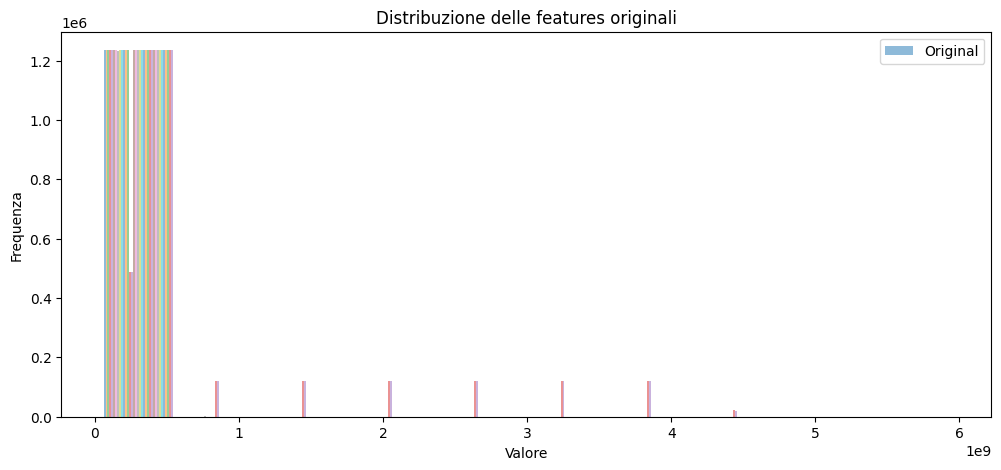

In [65]:
# Grafico dell'istogramma delle features originali
plt.figure(figsize=(12, 5))
plt.hist(X_train_num, bins=10, alpha=0.5, label='Original')
plt.title('Distribuzione delle features originali')
plt.xlabel('Valore')
plt.ylabel('Frequenza')
plt.legend()
plt.show()

Ora applico la standardizzazione a tutte le feature numeriche:

In [66]:
min_max_scaler = MinMaxScaler()
X_train_encoded[num_attributes] = min_max_scaler.fit_transform(X_train_encoded[num_attributes])

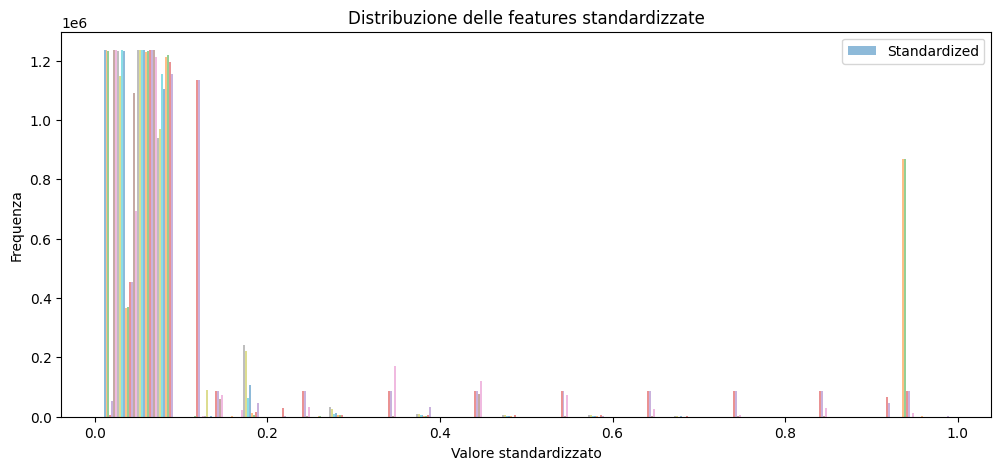

In [67]:
# Grafico dell'istogramma delle features standardizzate
plt.figure(figsize=(12, 5))
plt.hist(X_train_encoded[num_attributes], bins=10, alpha=0.5, label='Standardized')
plt.title('Distribuzione delle features standardizzate')
plt.xlabel('Valore standardizzato')
plt.ylabel('Frequenza')
plt.legend()
plt.show()

# FEATURE SELECTION

Seleziono le feature più rilevanti utilizzando la RFE (Recursive Feature Elimination). Questa tecnica consiste nel provare ad addestrare un estimatore selezionando ricorsivamente set sempre più piccoli di feature, andando così a capire quali possono essere scartate e quali invece vanno conservate. 

### VERSIONE LOGISTIC REGRESSION 

RFE Selector processa solo interi o float, dunque sistemo le colonne con tipo diverso.

Droppo le colonne di tipo Timestamp poichè non supportate:

In [68]:
# Rimuovo le colonne
X_train_encoded.drop('Stime', axis=1, inplace=True)
X_train_encoded.drop('Ltime', axis=1, inplace=True)

Converto la colonna dei target facendo sì che ogni elemento valga 0 se l'attacco è benigno e 1 se è maligno (qualsiasi esso sia):

In [69]:
# Sostituisco i valori di y_train con valori numerici 
y_train_encoded = y_train.replace({'Benign': 0, 'Reconnaissance': 1, 'Analysis': 1, 'Exploits': 1, 'Generic':1,
                                   'Fuzzers': 1, 'DoS': 1, 'Shellcode': 1, 'Backdoors': 1, 'Worms': 1})

Per poter utilizzare la RFE devo creare un estimatore che sia coerente con il mio scopo. Scelgo un estimatore di tipo LogisticRegression poichè adatto al compito di classificazione. La cosa ideale sarebbe utilizzare una LSTM, dal momento che rappresenta il modello che userò successivamente. Nel fare questo sorgerebbero però dei problemi dovuti alla shape del DataFrame: la LSTM ha infatti bisogno di un input in 3D, mentre la RFE si aspetta un input in 2D.

Il classico uso di RFE prevede la scelta del parametro 'n_features_to_select'. In sostanza ci permette di specificare il numero fisso n di featured che si vogliono selezionare, e rfe si occuperà di scegliere le migliori n features fra quelle totali.
Non sapendo però quale sia il numero ideale di feature da selezionare per questo dataset, usiamo la validazione incrociata. Questa permette di delegare la scelta del numero ottimale di feature alla RFECV, che le determinarà automaticamente basandosi sulle prestazioni del modello, riducendo il rischio di overfitting e migliorando la capacità del modello di generalizzare su nuovi dati.

Utilizziamo una particolare versione di validazione incrociata, ovvero quella stratificata (StratifiedKFold). Questo metodo mantiene la proporzione delle classi uguale in ogni suddivisione, garantendo che ogni fold della validazione incrociata sia rappresentativo della distribuzione delle classi originali.

Scelgo come passo di eliminazione delle caratteristiche il valore 1 (step=1), che significa che una caratteristica verrà rimossa ad ogni iterazione. Il punteggio utilizzato per valutare le prestazioni è l'accuratezza.

Stampo il risultato di RFECV:

Creo una lista con le feature selezionate, in modo da non dover runnare tutto da capo ogni volta:

In [70]:
selected_features = [
    'sbytes',
    'dbytes',
    'sttl',
    'dttl',
    'sloss',
    'dloss',
    'Sload',
    'Dload',
    'Spkts',
    'Dpkts',
    'swin',
    'dwin',
    'dmeansz',
    'Sjit',
    'Djit',
    'Sintpkt',
    'Dintpkt',
    'tcprtt',
    'synack',
    'ackdat',
    'ct_state_ttl',
    'ct_ftp_cmd',
    'ct_srv_src',
    'ct_srv_dst',
    'ct_dst_ltm',
    'ct_src_ltm',
    'ct_src_dport_ltm',
    'ct_dst_sport_ltm',
    'ct_dst_src_ltm',
    'dstip_10.40.170.2',
    'dstip_10.40.182.3',
    'dstip_10.40.198.10',
    'dstip_149.171.126.0',
    'dstip_149.171.126.1',
    'dstip_149.171.126.10',
    'dstip_149.171.126.11',
    'dstip_149.171.126.12',
    'dstip_149.171.126.13',
    'dstip_149.171.126.14',
    'dstip_149.171.126.15',
    'dstip_149.171.126.16',
    'dstip_149.171.126.17',
    'dstip_149.171.126.18',
    'dstip_149.171.126.19',
    'dstip_149.171.126.2',
    'dstip_149.171.126.3',
    'dstip_149.171.126.4',
    'dstip_149.171.126.5',
    'dstip_149.171.126.6',
    'dstip_149.171.126.7',
    'dstip_149.171.126.8',
    'dstip_149.171.126.9',
    'dstip_175.45.176.0',
    'dstip_175.45.176.1',
    'dstip_175.45.176.3',
    'dstip_224.0.0.1',
    'dstip_224.0.0.5',
    'dstip_32.50.32.66',
    'srcip_10.40.170.2',
    'srcip_10.40.182.1',
    'srcip_10.40.182.3',
    'srcip_10.40.85.1',
    'srcip_10.40.85.10',
    'srcip_149.171.126.10',
    'srcip_149.171.126.12',
    'srcip_149.171.126.14',
    'srcip_149.171.126.15',
    'srcip_149.171.126.18',
    'srcip_175.45.176.0',
    'srcip_175.45.176.1',
    'srcip_175.45.176.2',
    'srcip_175.45.176.3',
    'srcip_59.166.0.0',
    'srcip_59.166.0.1',
    'srcip_59.166.0.2',
    'srcip_59.166.0.3',
    'srcip_59.166.0.4',
    'srcip_59.166.0.5',
    'srcip_59.166.0.6',
    'srcip_59.166.0.7',
    'srcip_59.166.0.8',
    'srcip_59.166.0.9',
    'sport_0',
    'sport_1043',
    'sport_47439',
    'sport_Other',
    'dsport_0',
    'dsport_111',
    'dsport_143',
    'dsport_179',
    'dsport_21',
    'dsport_22',
    'dsport_25',
    'dsport_5190',
    'dsport_6881',
    'dsport_80',
    'dsport_Other',
    'proto_arp',
    'proto_ospf',
    'proto_tcp',
    'proto_unas',
    'state_CON',
    'state_ECO',
    'state_FIN',
    'state_INT',
    'state_MAS',
    'state_REQ',
    'state_RST',
    'state_URN',
    'state_no_state',
    'service_dhcp',
    'service_dns',
    'service_ftp',
    'service_ftp-data',
    'service_http',
    'service_no_service',
    'service_pop3',
    'service_smtp',
    'service_snmp',
    'service_ssh',
    'service_ssl',
    'is_sm_ips_ports_0',
    'is_sm_ips_ports_1'
]

In [71]:
len(selected_features)

123

Salvo il set di addestramento aggiornato con le colonne ottenute dalla selezione:

In [72]:
# Creo un nuovo DataFrame selected_X_train che contiene solo le colonne specificate
selected_X_train = X_train_encoded[selected_features]

# TRANSFORMATION PIPELINE

Definisco una funzione che ripercorre le trasformazioni applicate al set di addestramento, in modo da effettuare la stessa pipeline di pre-processamento anche al set di test e di validazione:

In [73]:
def preprocess_data(df):


    # ---------- CLEAN THE DATA ----------
    
    # GESTIONE BLANK VALUES:
    # Applico la funzione che trasforma stringhe vuote in zero (valore più ricorrente) 
    # alla colonna 'ct_ftp_cmd' del DataFrame
    df['ct_ftp_cmd'] = df['ct_ftp_cmd'].apply(blank_values_to_0)

    # GESTIONE NAN VALUES:
    # Rimuovo le seguenti due feature poichè contenenti troppi valoi nan (50%)
    df = df.drop('is_ftp_login', axis=1)
    df = df.drop('ct_flw_http_mthd', axis=1)


    # ---------- NUM AND CATEGORICAL FEATURES ----------

    # La colonna sport presenta degli spazi bianchi su alcuni elementi, questo falsa l'output di value_counts() quindi li rimuovo
    df["sport"] = df["sport"].str.strip()

    # Applico la funzione alla colonna 'sport' del DataFrame
    df['sport'] = df['sport'].apply(trasforma_sport)

    # Applico la funzione alla colonna 'dsport' del DataFrame
    df['dsport'] = df['dsport'].apply(trasforma_dsport)

    # Applico la funzione alla colonna 'proto' del DataFrame
    df['proto'] = df['proto'].apply(trasforma_proto)

    # Applico la funzione alla colonna 'state' del DataFrame
    df['state'] = df['state'].apply(trasforma_state)

    # Applico la funzione alla colonna 'service' del DataFrame
    df['service'] = df['service'].apply(trasforma_service)

    # Setto il tipo delle numeriche a float (in modo che siano uniformi)
    df[num_attributes] = df[num_attributes].astype(float)

    # Inizializzo un DataFrame vuoto per concatenare i risultati
    encoded_feat = pd.DataFrame(index=df.index)

    # Applico la trasformazione ad ogni feature categorica 
    # (va fatto insieme e non con un ciclo for, altrimenti l'encoder pensa che mancano delle categorie)
    encoded_feat = cat_encoder.transform(df[cat_attributes])

    # Droppo le vecchie feature categoriche
    df_dropped = df.drop(columns=cat_attributes)

    # Concateno il vecchio DataFrame senza le feature categoriche con il nuovo DataFrame encodato
    df_encoded = pd.concat([df_dropped, encoded_feat], axis=1)
    

    # ---------- FEATURE SCALING ----------

    df_encoded[num_attributes] = min_max_scaler.transform(df_encoded[num_attributes])


    # ---------- FEATURE SELECTION ----------

    # Creo un nuovo DataFrame selected_df che contiene solo le colonne specificate
    selected_df = df_encoded[selected_features]

    return selected_df

In [74]:
# Applico la funzione di preprocessing sia al test set che al validation set
train_set_processed = selected_X_train
val_set_processed = preprocess_data(X_val)
test_set_processed = preprocess_data(X_test)

Definisco la stessa funzione che servirà per la k-fold cross validation, in modo da potergli passare il min max scaler addestrato sullo specifico set di training generato ad ogni iterazione:

In [75]:
def preprocess_data_cross(df, cross_min_max_scaler):
    # ---------- CLEAN THE DATA ----------
    
    # GESTIONE BLANK VALUES:
    # Trasforma stringhe vuote in zero (valore più ricorrente) alla colonna 'ct_ftp_cmd'
    df.loc[:, 'ct_ftp_cmd'] = df['ct_ftp_cmd'].apply(blank_values_to_0)

    # GESTIONE NAN VALUES:
    # Rimuovo le seguenti due feature poiché contenenti troppi valori NaN (50%)
    df = df.drop(['is_ftp_login', 'ct_flw_http_mthd'], axis=1)

    # ---------- NUM AND CATEGORICAL FEATURES ----------

    # Rimuovo spazi bianchi nella colonna sport
    df.loc[:, "sport"] = df["sport"].str.strip()

    # Applica le funzioni di trasformazione
    df.loc[:, 'sport'] = df['sport'].apply(trasforma_sport)
    df.loc[:, 'dsport'] = df['dsport'].apply(trasforma_dsport)
    df.loc[:, 'proto'] = df['proto'].apply(trasforma_proto)
    df.loc[:, 'state'] = df['state'].apply(trasforma_state)
    df.loc[:, 'service'] = df['service'].apply(trasforma_service)

    # Setta il tipo delle numeriche a float
    df.loc[:, num_attributes] = df[num_attributes].astype(float)

    # Applica la trasformazione alle feature categoriche
    encoded_feat = cat_encoder.transform(df[cat_attributes])

    # Droppa le vecchie feature categoriche e concatena le nuove
    df_encoded = pd.concat([df.drop(columns=cat_attributes), pd.DataFrame(encoded_feat, index=df.index)], axis=1)

    # ---------- FEATURE SCALING ----------
    df_encoded.loc[:, num_attributes] = cross_min_max_scaler.transform(df_encoded[num_attributes])

    # ---------- FEATURE SELECTION ----------
    selected_df = df_encoded[selected_features]

    return selected_df


In [76]:
def preprocess_data_cross_train(X_train):
    # ---------- CLEAN THE DATA ----------
    
    # GESTIONE BLANK VALUES:
    X_train.loc[:, 'ct_ftp_cmd'] = X_train['ct_ftp_cmd'].apply(blank_values_to_0)

    # GESTIONE NAN VALUES:
    X_train = X_train.drop(['is_ftp_login', 'ct_flw_http_mthd'], axis=1)

    # ---------- NUM AND CATEGORICAL FEATURES ----------

    # Rimuovo spazi bianchi nella colonna sport
    X_train.loc[:, "sport"] = X_train["sport"].str.strip()

    # Applico le funzioni di trasformazione
    X_train.loc[:, 'sport'] = X_train['sport'].apply(trasforma_sport)
    X_train.loc[:, 'dsport'] = X_train['dsport'].apply(trasforma_dsport)
    X_train.loc[:, 'proto'] = X_train['proto'].apply(trasforma_proto)
    X_train.loc[:, 'state'] = X_train['state'].apply(trasforma_state)
    X_train.loc[:, 'service'] = X_train['service'].apply(trasforma_service)

    # Setto il tipo delle numeriche a float
    X_train.loc[:, num_attributes] = X_train[num_attributes].astype(float)

    # Applico la trasformazione alle feature categoriche
    preprocess_encoded_feat = cat_encoder.fit_transform(X_train[cat_attributes])

    # Droppo le vecchie feature categoriche e concatena le nuove
    X_train_encoded = pd.concat([X_train.drop(columns=cat_attributes), pd.DataFrame(preprocess_encoded_feat, index=X_train.index)], axis=1)

    # ---------- FEATURE SCALING ----------
    cross_min_max_scaler = MinMaxScaler()
    X_train_encoded.loc[:, num_attributes] = cross_min_max_scaler.fit_transform(X_train_encoded[num_attributes])

    # ---------- FEATURE SELECTION ----------
    selected_X_train = X_train_encoded[selected_features]

    return selected_X_train, cross_min_max_scaler


# CHECKING LABEL DISTRIBUTION

Calcolo la distribuzione delle categorie nei target per ciascun set di dati creato:

In [77]:
# Funzione che restituisce un dizionario con le distribuzioni delle categorie per i tre set di dati
def calculate_category_distribution(y_train, y_val, y_test):
    
    def distribution(y):
        return pd.Series(y).value_counts(normalize=True) * 100

    # dizionario che contiene la distribuzione percentuale delle categorie per ciascun set
    distribution_dict = {
        "train_distribution": distribution(y_train),
        "val_distribution": distribution(y_val),
        "test_distribution": distribution(y_test)
    }

    return distribution_dict

distribution = calculate_category_distribution(y_train, y_val, y_test)

print("Distribuzione Training Set:")
print(distribution["train_distribution"])

print("\nDistribuzione Validation Set:")
print(distribution["val_distribution"])

print("\nDistribuzione Test Set:")
print(distribution["test_distribution"])


Distribuzione Training Set:
attack_cat
Benign            95.159710
Exploits           1.345204
Generic            1.223568
Fuzzers            1.056449
Reconnaissance     0.653503
DoS                0.278396
Analysis           0.101404
Backdoors          0.098329
Shellcode          0.074374
Worms              0.009064
Name: proportion, dtype: float64

Distribuzione Validation Set:
attack_cat
Benign            95.171202
Exploits           1.310324
Generic            1.244528
Fuzzers            1.068993
Reconnaissance     0.643872
DoS                0.266581
Analysis           0.108526
Backdoors          0.102456
Shellcode          0.075992
Worms              0.007526
Name: proportion, dtype: float64

Distribuzione Test Set:
attack_cat
Benign            95.157605
Exploits           1.354754
Generic            1.246228
Fuzzers            1.053212
Reconnaissance     0.638531
DoS                0.273621
Analysis           0.117509
Backdoors          0.084004
Shellcode          0.067738
Worms

# SELECT AND TRAIN A MODEL

In [78]:
import tensorflow as tf
import logging

# Set the logging level for TensorFlow to only show errors
tf.get_logger().setLevel(logging.ERROR)

tf.random.set_seed(42)

def build_model(input_shape):

    # LSTM model
    model = tf.keras.Sequential([
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.LSTM(128, return_sequences=True),
        tf.keras.layers.LSTM(128, return_sequences=True),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(10, activation='softmax')    # la colonna dei target ha 10 classi (9 + benigno)
    ])

    model.compile(loss='categorical_crossentropy',      # perchè le etichette sono one-hot
              optimizer='adam',
              metrics=['accuracy'])

    return model

## TRAIN_TEST_SPLIT

Quando configuro la input_shape nel modello, occorre specificare solo le dimensioni (timesteps, features) perché batch_size viene gestito automaticamente durante l'addestramento. 
Essendo i dati inizialmente in formato 2D (ogni riga rappresenta un campione con 19 feature), la loro forma è (batch_size, 19). 

Tuttavia, le LSTM richiedono dati di input in formato 3D con la forma (batch_size, timesteps, features), dunque occorre espandere la dimensione dei dati per far sì che ogni campione abbia una dimensione temporale esplicita.

In [79]:
# Aggiungo una dimensione ai dati di input per soddisfare la forma attesa dall'LSTM (batch_size, timesteps, feature per timestep)
X_train_reshaped = np.expand_dims(train_set_processed, axis=1)
X_val_reshaped = np.expand_dims(val_set_processed, axis=1)
X_test_reshaped = np.expand_dims(test_set_processed, axis=1)

Analizzo la dimensione del dataset completo per decidere il valore da assegnare al parametro _timesteps_:

In [80]:
# Visualizzo il numero di righe del DataFrame
df.shape[0]

2059415

Di seguito provo vari valori per capire quale finestra temporale sia la più adatta al modello. Proseguirò in termini di numero di campioni (osservazioni), invece che in termini temporali.

### MODEL 1 (timesteps = 53)

Scelgo di utilizzare una finestra temporale di 1 minuto, in modo da cogliere eventuali pattern significativi che andrebbero persi con finestre più ampie. Il numero di osservazioni che costituiscono il dataset è di 2.059.415, lo divido per il numero di minuti totali trascorsi a effettuare le osservazioni (27 giorni = 38.880 min) e ottengo il mio valore di timesteps = 53 

In [81]:
input_shape_53 = (53, len(selected_features)) 

model_1 = build_model(input_shape_53)

In [82]:
# Addestro il modello usando i dati preprocessati
history = model_1.fit(X_train_reshaped, y_train_categorical, epochs=10, batch_size=64, validation_data=(X_val_reshaped, y_val_categorical))

# Valuto l'accuratezza del modello sui dati di validazione
valid_loss, valid_acc = model_1.evaluate(X_val_reshaped, y_val_categorical)
print(f'Validation Accuracy: {valid_acc * 100:.2f}%')

Epoch 1/10
19308/19308 ━━━━━━━━━━━━━━━━━━━━ 89s 4ms/step - accuracy: 0.9508 - loss: 0.2990 - val_accuracy: 0.9517 - val_loss: 0.2725
Epoch 2/10
19308/19308 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.9514 - loss: 0.2729 - val_accuracy: 0.9517 - val_loss: 0.2688
Epoch 3/10
19308/19308 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.9514 - loss: 0.2702 - val_accuracy: 0.9517 - val_loss: 0.2681
Epoch 4/10
19308/19308 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.9514 - loss: 0.2695 - val_accuracy: 0.9517 - val_loss: 0.2678
Epoch 5/10
19308/19308 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.9514 - loss: 0.2690 - val_accuracy: 0.9517 - val_loss: 0.2675
Epoch 6/10
19308/19308 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.9514 - loss: 0.2687 - val_accuracy: 0.9517 - val_loss: 0.2674
Epoch 7/10
19308/19308 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.9514 - loss: 0.2684 - val_accuracy: 0.9517 - val_loss: 0.2673
Epoch 8/10
19308/19308 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 

In [83]:
# Valuto l'accuratezza del modello sui dati del test set
test_loss, test_acc = model_1.evaluate(X_test_reshaped, y_test_categorical)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))

  125/12872 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.9514 - loss: 0.2718

12872/12872 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.9517 - loss: 0.2676
Test Accuracy: 95.16%


Per una valutazione più attendibile uso F1 score:

In [84]:
from sklearn.metrics import f1_score

y_val_pred = model_1.predict(X_val_reshaped)
y_test_pred = model_1.predict(X_test_reshaped)

# Converto le predizioni da probabilità in etichette di classe
y_val_pred_labels = tf.argmax(y_val_pred, axis=1)
y_test_pred_labels = tf.argmax(y_test_pred, axis=1)

# Calcolo F1-score
val_f1 = f1_score(tf.argmax(y_val_categorical, axis=1), y_val_pred_labels, average='macro')
test_f1 = f1_score(tf.argmax(y_test_categorical, axis=1), y_test_pred_labels, average='macro')

# Visualizzo il risultato
print(f"Validation F1-Score: {val_f1:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")

12872/12872 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step
12872/12872 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step
Validation F1-Score: 0.10
Test F1-Score: 0.10


### MODEL 2 (timesteps = 3178)

Provo una finestra temporale di 1 ora. Il numero di osservazioni che costituiscono il dataset è di 2.059.415, lo divido per il numero di ore totali trascorsi a effettuare le osservazioni (27 giorni = 648 ore) e ottengo il mio valore di timesteps = 3178

In [85]:
input_shape_3178 = (3178, len(selected_features)) 

model_2 = build_model(input_shape_3178)

In [86]:
# Definisco una callbacks early stopping
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)

# Addestro il modello usando i dati preprocessati
history = model_2.fit(X_train_reshaped, y_train_categorical, epochs=10, batch_size=64, validation_data=(X_val_reshaped, y_val_categorical), callbacks=[early_stopping_cb])

# Valuto l'accuratezza del modello sui dati di validazione
valid_loss, valid_acc = model_2.evaluate(X_val_reshaped, y_val_categorical)
print(f'Validation Accuracy: {valid_acc * 100:.2f}%')

Epoch 1/10
19308/19308 ━━━━━━━━━━━━━━━━━━━━ 90s 4ms/step - accuracy: 0.9508 - loss: 0.2996 - val_accuracy: 0.9517 - val_loss: 0.2725
Epoch 2/10
19308/19308 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.9514 - loss: 0.2731 - val_accuracy: 0.9517 - val_loss: 0.2689
Epoch 3/10
19308/19308 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.9514 - loss: 0.2703 - val_accuracy: 0.9517 - val_loss: 0.2683
Epoch 4/10
19308/19308 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.9514 - loss: 0.2697 - val_accuracy: 0.9517 - val_loss: 0.2680
Epoch 5/10
19308/19308 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.9514 - loss: 0.2693 - val_accuracy: 0.9517 - val_loss: 0.2678
Epoch 6/10
19308/19308 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.9514 - loss: 0.2690 - val_accuracy: 0.9517 - val_loss: 0.2676
12872/12872 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9514 - loss: 0.2739
Validation Accuracy: 95.17%


In [87]:
# Valuto l'accuratezza del modello sui dati del test set
test_loss, test_acc = model_2.evaluate(X_test_reshaped, y_test_categorical)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))

 2128/12872 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9523 - loss: 0.2695

12872/12872 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9517 - loss: 0.2726
Test Accuracy: 95.16%


In [88]:
y_val_pred = model_2.predict(X_val_reshaped)
y_test_pred = model_2.predict(X_test_reshaped)

# Converto le predizioni da probabilità in etichette di classe
y_val_pred_labels = tf.argmax(y_val_pred, axis=1)
y_test_pred_labels = tf.argmax(y_test_pred, axis=1)

# Calcolo F1-score
val_f1 = f1_score(tf.argmax(y_val_categorical, axis=1), y_val_pred_labels, average='macro')
test_f1 = f1_score(tf.argmax(y_test_categorical, axis=1), y_test_pred_labels, average='macro')

# Visualizzo il risultato
print(f"Validation F1-Score: {val_f1:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")

12872/12872 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step
12872/12872 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step
Validation F1-Score: 0.10
Test F1-Score: 0.10
